In [94]:
%matplotlib inline

import pandas as pd
import os
import sys
import glob
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import math
from scipy import sparse
import random

import scanpy as sc
import scvelo as scv
import cellrank as cr

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
sc.set_figure_params(dpi=300,dpi_save=600,
                     frameon=False,
                     fontsize=9)
plt.rcParams['savefig.dpi']=600
sc.settings.verbosity=2
sc._settings.ScanpyConfig.n_jobs=-1
sns.set_style("ticks")



In [4]:

adata_file = '/home/ngr4/project/scnd/data/processed/mouse_200614.h5ad'
adata = sc.read(adata_file)

In [13]:
print('Loading loom files...')
total_t = time.time()
# read in looms
## point to directory where ./sample1 ./sample2, etc. exists and ./sample/*loom exists
loom_fpath = '/home/ngr4/project/scnd/data/*wk/'
loom_files = glob.glob(os.path.join(loom_fpath,'*/*.loom'))
sample_names = [os.path.split(os.path.split(loom_files[i])[0])[1] for i in range(len(loom_files))]

adata_looms = {}
for i in range(len(loom_files)):
    start = time.time()
    if i == 0:
        adata_loom = scv.read_loom(loom_files[i],sparse=True,cleanup=True)
        adata_loom.var_names_make_unique()
    else:
        adata_looms[sample_names[i]] = scv.read_loom(loom_files[i],sparse=True,cleanup=True)
        adata_looms[sample_names[i]].var_names_make_unique()
    print('  {} loom loaded in {:.0f}-s'.format(os.path.split(loom_files[i])[0].split('/home/ngr4/project/scnd/data/')[1], time.time() - start))
print('... looms loaded in {}-min'.format((time.time() - total_t)/60))   

print('\nConcatenating loom files...')
try:
    adata_loom = adata_loom.concatenate(*adata_looms.values(), batch_categories=sample_names)
except InvalidIndexError:
    adata_loom = adata_loom.concatenate(*adata_looms.values(), batch_categories=sample_names)
print('... loaded and concatenated after {}-min'.format((time.time() - total_t)/60))   

print('\nMerging looms and adata...')
if True:
    # merge with existing adata
    adata = scv.utils.merge(adata, adata_loom)
print('... scv adata after {}-min'.format((time.time() - total_t)/60))  

Loading loom files...


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  30wk/5812 loom loaded in 31-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  30wk/58232 loom loaded in 44-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  30wk/5822 loom loaded in 38-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  30wk/58241 loom loaded in 48-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  30wk/58231 loom loaded in 51-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  30wk/58242 loom loaded in 40-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  5wk/7202 loom loaded in 45-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  5wk/72922 loom loaded in 34-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  5wk/72932 loom loaded in 27-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  5wk/72931 loom loaded in 27-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  5wk/72921 loom loaded in 35-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  5wk/7294 loom loaded in 25-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  18wk/65702 loom loaded in 61-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  18wk/65732 loom loaded in 79-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  18wk/65731 loom loaded in 73-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  18wk/65701 loom loaded in 54-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  18wk/6571 loom loaded in 68-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  18wk/6569 loom loaded in 76-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  12wk/22019 loom loaded in 25-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  12wk/2062 loom loaded in 27-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  12wk/2063 loom loaded in 21-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  12wk/2065 loom loaded in 32-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  12wk/2061 loom loaded in 19-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  12wk/22018 loom loaded in 31-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  24wk/20202 loom loaded in 36-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  24wk/1974 loom loaded in 44-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  24wk/2020 loom loaded in 33-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  24wk/2021 loom loaded in 32-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  24wk/1589 loom loaded in 25-s


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


  24wk/20212 loom loaded in 28-s
... looms loaded in 20.15564553340276-min

Concatenating loom files...
... loaded and concatenated after 20.292951186498005-min

Merging looms and adata...
... scv adata after 21.70019623438517-min


In [ ]:
save_adata = False

In [15]:
if save_adata:
    # save this adata
    fpath = '/home/ngr4/scratch60/scnd/data/processed/'
    if not os.path.exists(fpath):
        os.mkdir(fpath)
    adata.write(os.path.join(fpath, 'adata_and_loom_2110514.h5ad'))
    save_adata = False

... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [16]:
adata.obs.groupby('ctype').count()

batch  genotype  timepoint  \
ctype                                                          
Astrocyte                          8176      8176       8176   
Bergmann glia                      9566      9566       9566   
Endothelial cell                   3017      3017       3017   
GABAergic interneuron 1           13609     13609      13609   
GABAergic interneuron 2            3879      3879       3879   
GABAergic interneuron 3             891       891        891   
Granule cell                     254793    254793     254793   
Microglia                          1003      1003       1003   
Oligodendrocyte                    9316      9316       9316   
Oligodendrocyte progenitor cell    1001      1001       1001   
Pericyte                           1486      1486       1486   
Purkinje cell                      2131      2131       2131   
Unipolar brush cell                3134      3134       3134   

                                 n_genes_by_counts  log1p_n_genes_by_counts  \
ctype                                                                         
Astrocyte                                     8176                     8176   
Bergmann glia                                 9566                     9566   
Endothelial cell                              3017                     3017   
GABAergic interneuron 1                      13609                    13609   
GABAergic interneuron 2                       3879                     3879   
GABAergic interneuron 3                        891                      891   
Granule cell                                254793                   254793   
Microglia                                     1003                     1003   
Oligodendrocyte                               9316                     9316   
Oligodendrocyte progenitor cell               1001                     1001   
Pericyte                                      1486                     1486   
Purkinje cell                                 2131                     2131   
Unipolar brush cell                           3134                     3134   

                                 total_counts  log1p_total_counts  \
ctype                                                               
Astrocyte                                8176                8176   
Bergmann glia                            9566                9566   
Endothelial cell                         3017                3017   
GABAergic interneuron 1                 13609               13609   
GABAergic interneuron 2                  3879                3879   
GABAergic interneuron 3                   891                 891   
Granule cell                           254793              254793   
Microglia                                1003                1003   
Oligodendrocyte                          9316                9316   
Oligodendrocyte progenitor cell          1001                1001   
Pericyte                                 1486                1486   
Purkinje cell                            2131                2131   
Unipolar brush cell                      3134                3134   

                                 pct_counts_in_top_50_genes  \
ctype                                                         
Astrocyte                                              8176   
Bergmann glia                                          9566   
Endothelial cell                                       3017   
GABAergic interneuron 1                               13609   
GABAergic interneuron 2                                3879   
GABAergic interneuron 3                                 891   
Granule cell                                         254793   
Microglia                                              1003   
Oligodendrocyte                                        9316   
Oligodendrocyte progenitor cell                        1001   
Pericyte                                               1486   
Purkinje cell                   

In [17]:
# subset data to one cell type (oligodendrocyte, e.g.)
adata = adata[(adata.obs['ctype']=='Astrocyte'), :]

In [18]:
adata

View of AnnData object with n_obs × n_vars = 8176 × 26374
    obs: 'batch', 'genotype', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pmito', 'n_genes', 'louvain', 'res_sca1', 'ees_sca1', 'stored_ctype', 'ctype', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_phate', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# standard Cellrank recipe

In [19]:
# standard recipe for pancreas; REF: 
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=20, n_neighbors=30)
scv.pp.moments(adata, n_pcs=20, n_neighbors=30)

computing PCA
    with n_comps=50
    finished (0:00:50)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished (0:00:16)


Normalized count data: spliced, unspliced.
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [20]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/20 cores)


  0%|          | 0/1224 [00:00<?, ?gene/s]

    finished (0:15:48) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [21]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:17) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [22]:
# recalculate phate and umap
sc.tl.umap(adata)
sc.external.tl.phate(adata, gamma=0)

computing UMAP
    finished (0:00:26)


In [29]:
# phate
sc.external.tl.phate(adata, gamma=0)

computing PHATE


Calculating PHATE...
  Running PHATE on 8176 observations and 26374 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 11.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.19 seconds.
    Calculating affinities...
    Calculated affinities in 3.08 seconds.
  Calculated graph and diffusion operator in 16.62 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.30 seconds.
    Calculating KMeans...
    Calculated KMeans in 14.34 seconds.
  Calculated landmark operator in 18.19 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 1.41 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.43 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.51 seconds.
Calculated PHATE in 42.16 seconds.


    finished (0:00:43)


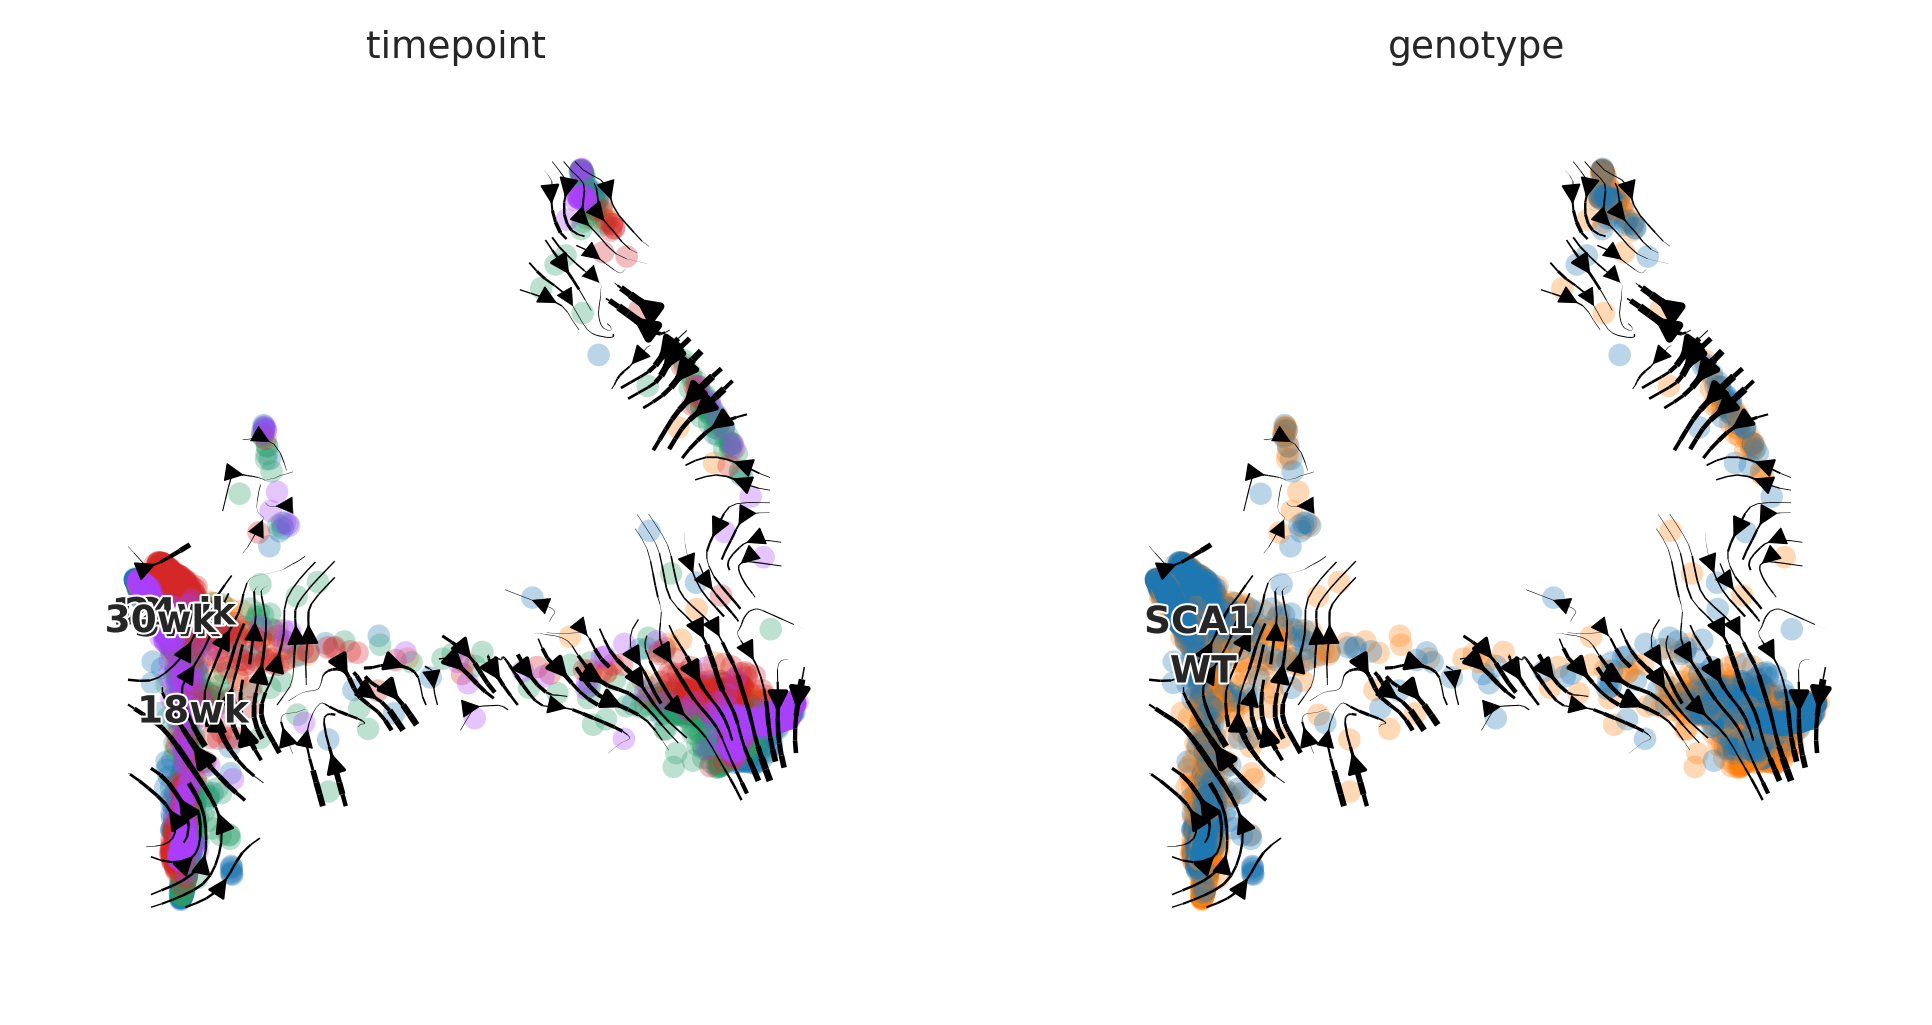

In [30]:
scv.pl.velocity_embedding_stream(adata, basis='phate', color=['timepoint', 'genotype'])


In [32]:
sc.tl.leiden(adata)

running Leiden clustering
    finished (0:00:00)


In [43]:
cr.tl.terminal_states(adata, clusters='leiden', estimator=cr.tl.estimators.CFLARE)


Using precomputed transition matrix
Found categorical observation in `adata.obs['louvain']`. Consider specifying it as `cluster_key`.
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eig_fwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Computing approximate recurrent classes
Adding `adata.obs['terminal_states_probs']`
       `adata.obs['terminal_states']`
       `.terminal_states_probabilities`
       `.terminal_states`
    Finish (0:00:00)


/gpfs/ycga/project/dijk/ngr4/conda_envs/py38_scvprob/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


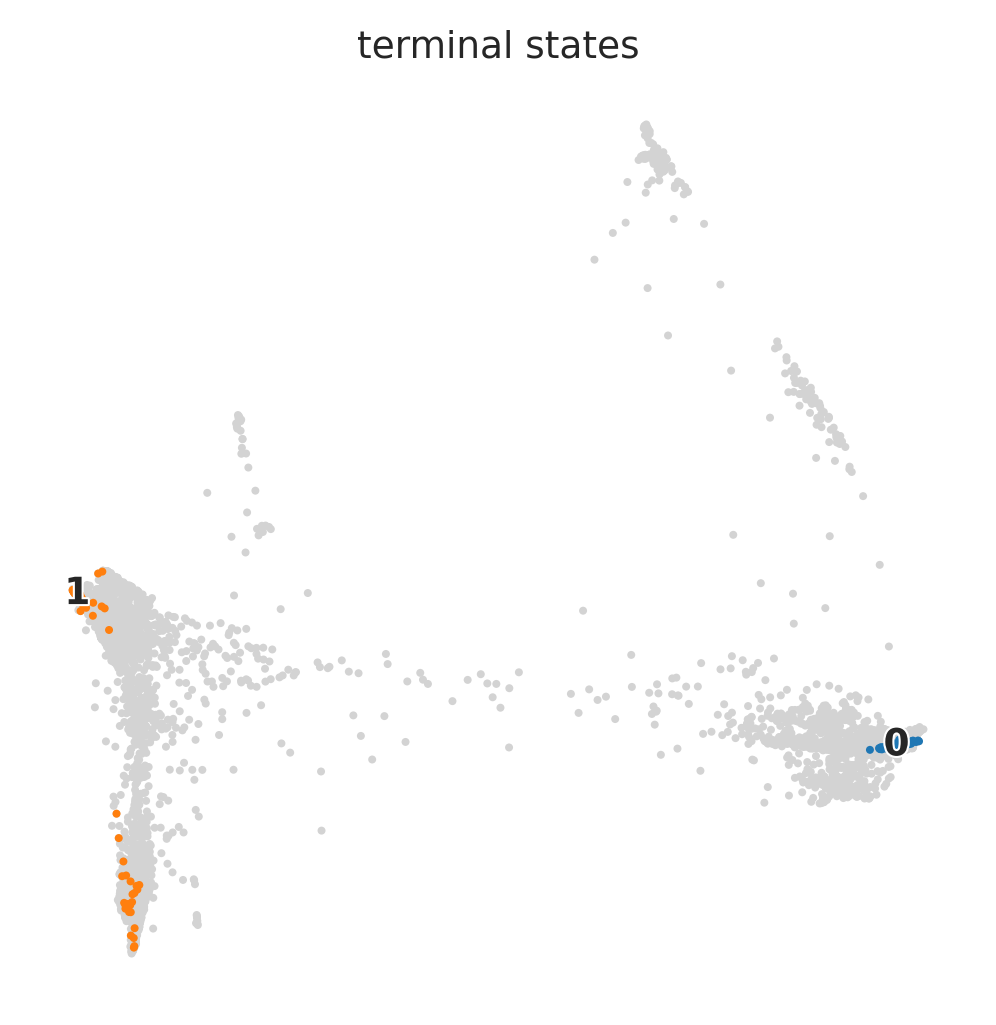

In [46]:
cr.pl.terminal_states(adata, basis='phate')


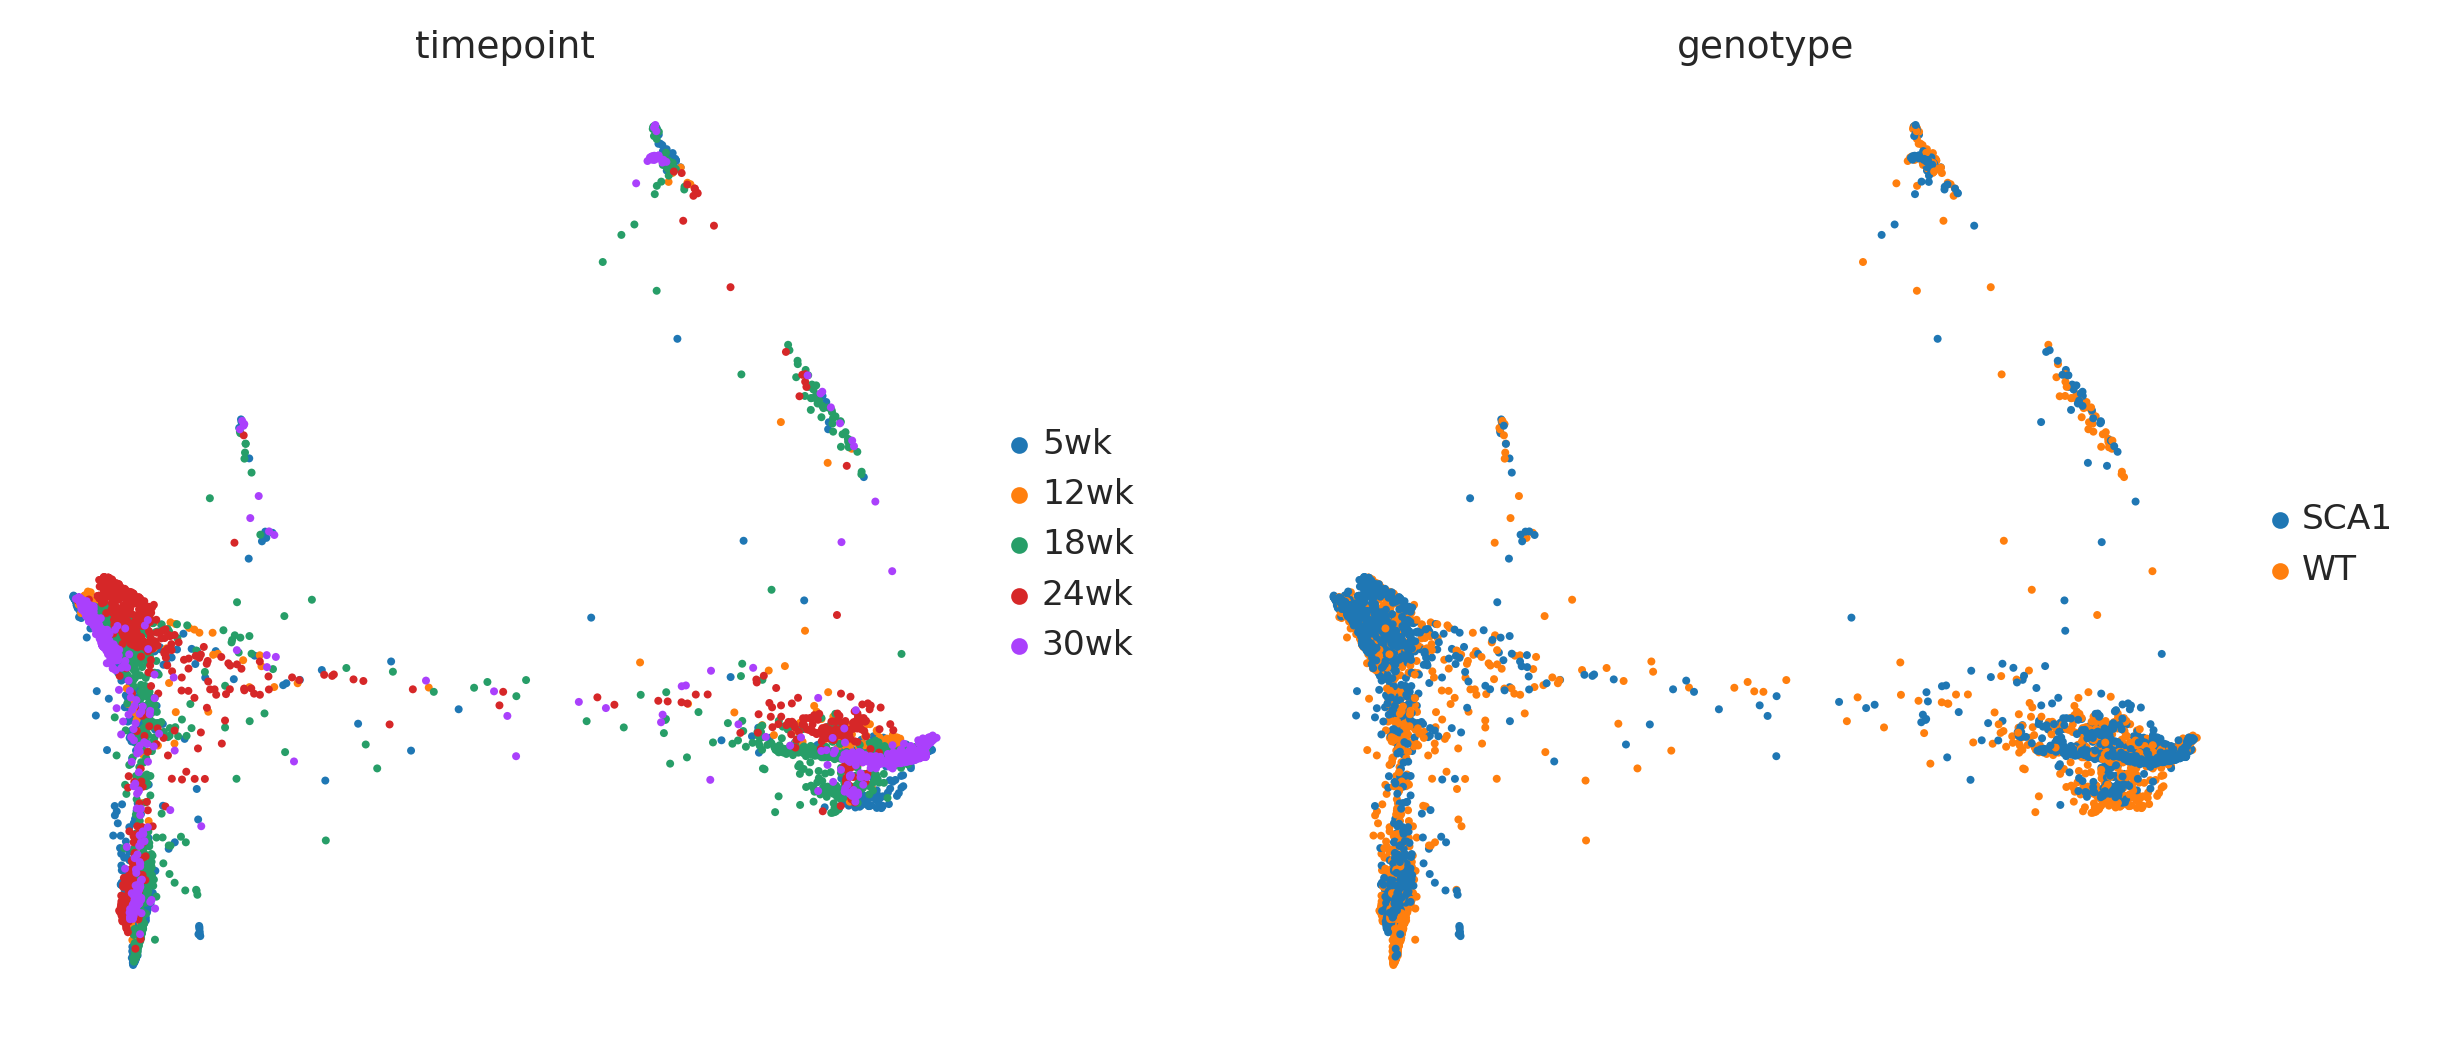

In [47]:
sc.external.pl.phate(adata, color=['timepoint', 'genotype'])

In [48]:
cr.tl.initial_states(adata, cluster_key='leiden')


Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


  0%|          | 0/8176 [00:00<?, ?cell/s]

Setting `softmax_scale=9.7563`


  0%|          | 0/8176 [00:00<?, ?cell/s]

    Finish (0:00:22)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eig_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `.macrostates_memberships`
        `.macrostates`
    Finish (0:00:00)
Adding `adata.obs['initial_states_probs']`
       `adata.obs['initial_states']`
       `adata.obsm['macrostates_bwd']`
       `.terminal_states_probabilities`
       `.terminal_states`
    Finish


/gpfs/ycga/project/dijk/ngr4/conda_envs/py38_scvprob/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


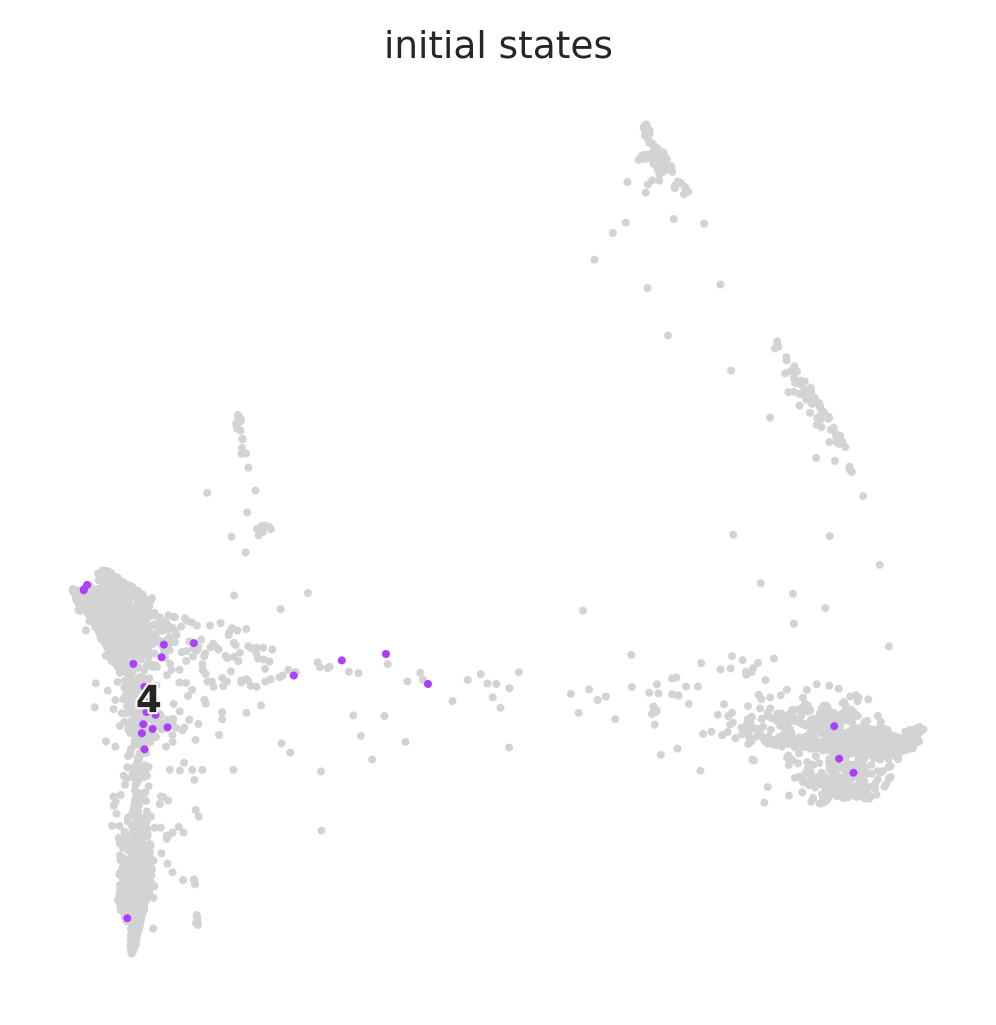

In [50]:
cr.pl.initial_states(adata, discrete=True, basis='phate')


Computing lineage probabilities towards terminal states
Computing absorption probabilities


  0%|          | 0/258 [00:00<?, ?/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:04)
Adding lineages to `adata.obsm['to_terminal_states']`
    Finish (0:00:04)


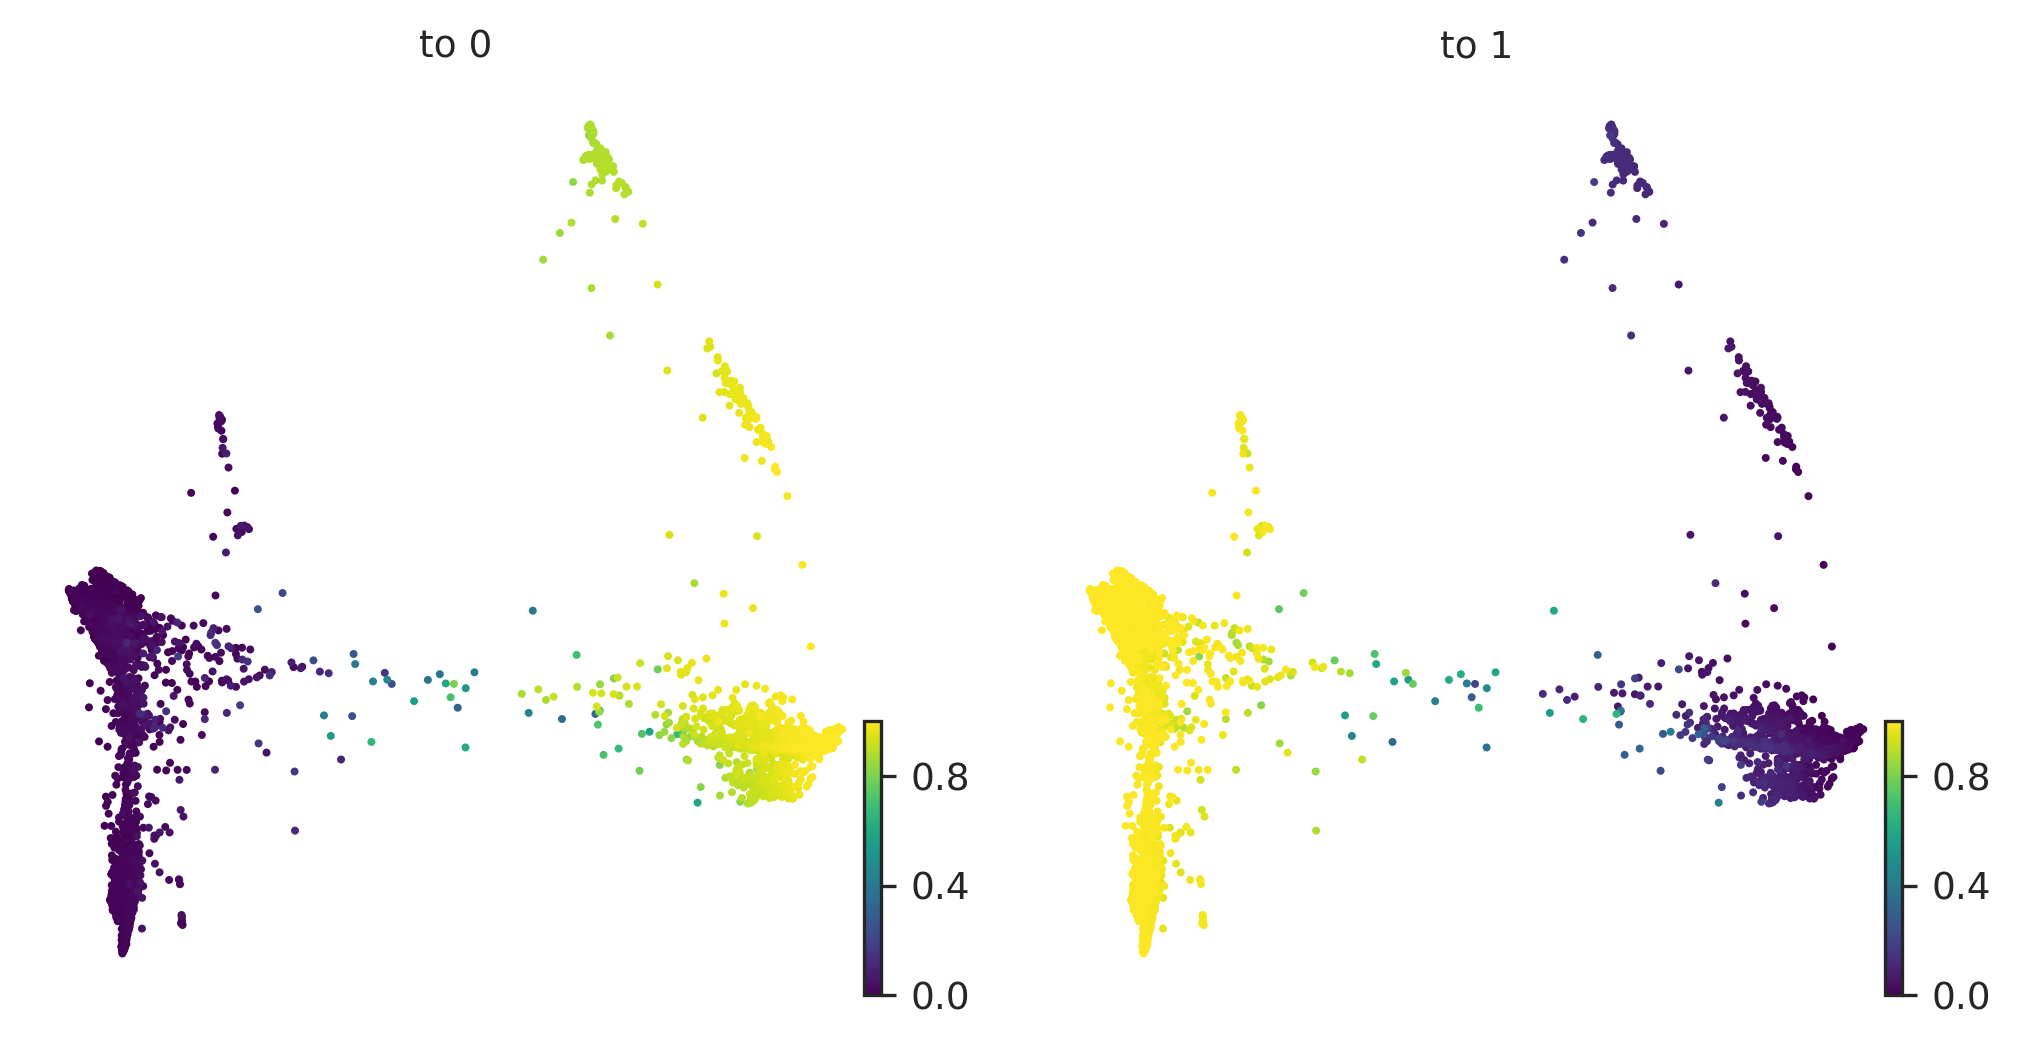

In [52]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False, basis='phate')

/gpfs/ycga/project/dijk/ngr4/conda_envs/py38_scvprob/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


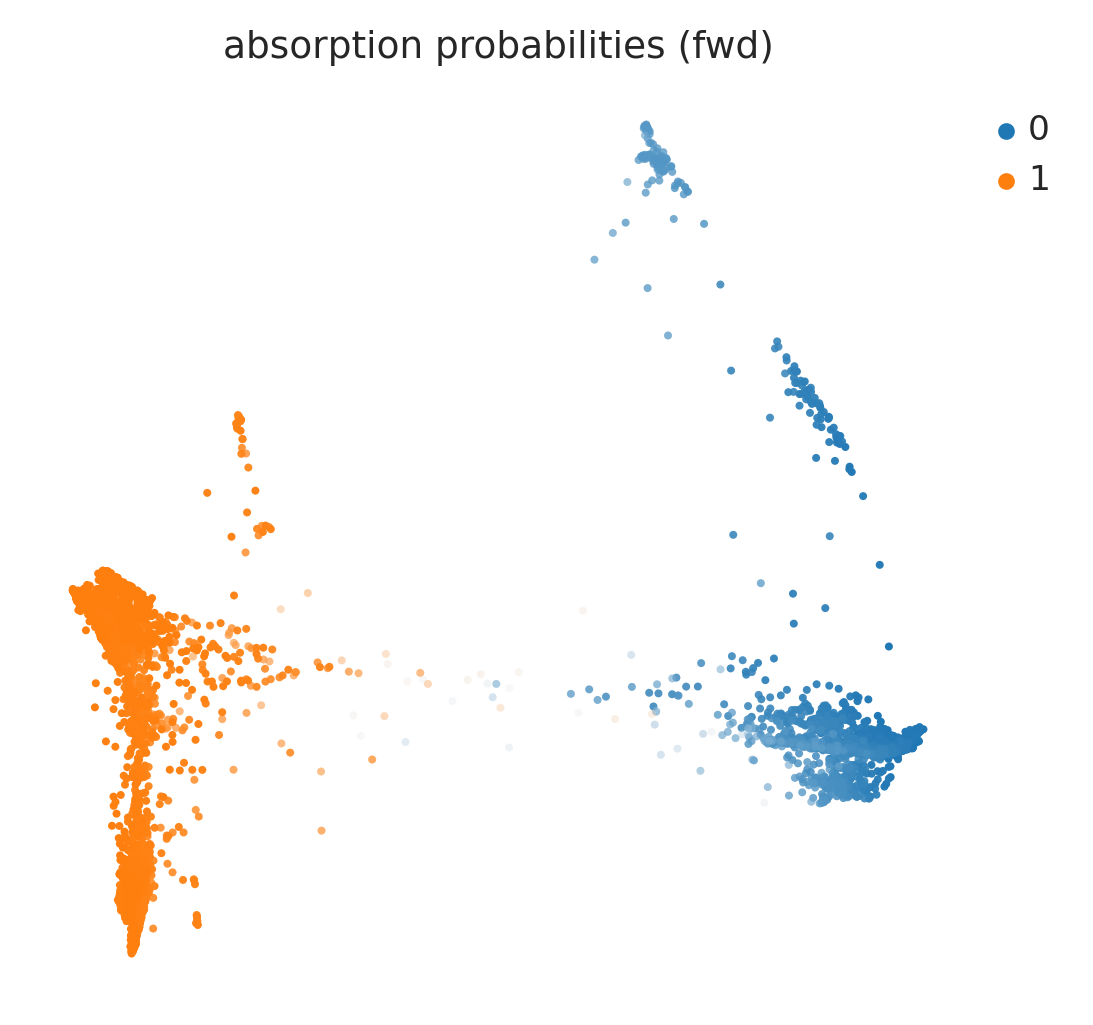

In [53]:
cr.pl.lineages(adata, same_plot=True, basis='phate')

In [54]:
# compute latent time
scv.tl.recover_latent_time(adata, root_key='initial_states_probs', end_key='terminal_states_probs')

computing latent time using initial_states_probs, terminal_states_probs as prior
    finished (0:00:05) --> added 
    'latent_time', shared time (adata.obs)


In [56]:
scv.tl.paga(adata, groups='leiden', root_key='initial_states_probs', end_key='terminal_states_probs',
            use_time_prior='velocity_pseudotime')

running PAGA using priors: ['velocity_pseudotime', 'initial_states_probs', 'terminal_states_probs']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [71]:
import phate
data_phate1d = phate.PHATE(gamma=0, n_components=1).fit_transform(adata.X)

Calculating PHATE...
  Running PHATE on 8176 observations and 26374 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 6.20 seconds.
    Calculating affinities...
    Calculated affinities in 1.19 seconds.
  Calculated graph and diffusion operator in 18.16 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.62 seconds.
    Calculating KMeans...
    Calculated KMeans in 16.52 seconds.
  Calculated landmark operator in 18.41 seconds.
  Calculating optimal t...
    Automatically selected t = 38
  Calculated optimal t in 1.44 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.26 seconds.
Calculated PHATE in 43.69 seconds.


In [73]:
rand_hgt = np.random.uniform(size=(data_phate1d.shape[0],))

Text(0.5, 1.0, 'Cellrank pseudotime')

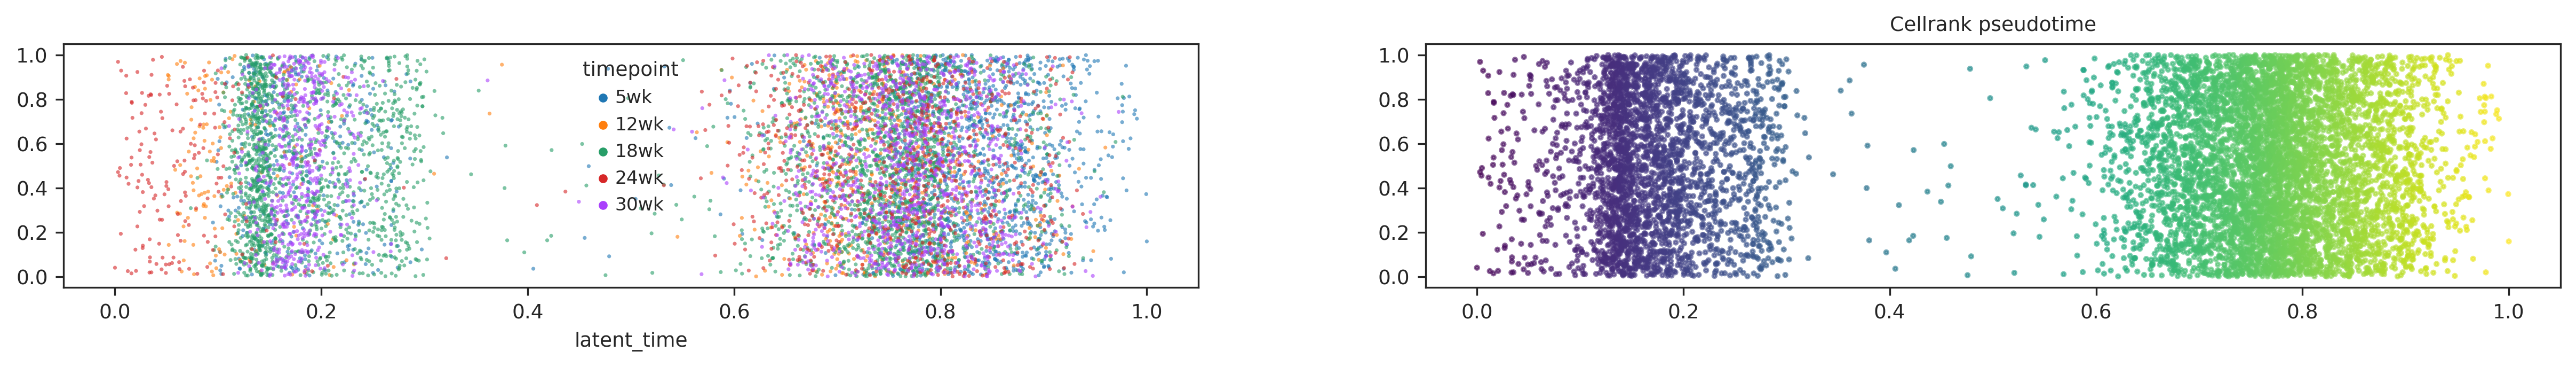

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(20, 2))
sns.scatterplot(x=adata.obs['latent_time'], y=rand_hgt, hue=adata.obs['timepoint'], ax=ax[0], linewidth=0., alpha=0.6, s=3)
ax[1].scatter(adata.obs['latent_time'], rand_hgt, c=adata.obs['latent_time'].to_numpy(), cmap='viridis', s=3, alpha=0.6)
ax[1].set_title('Cellrank pseudotime')

In [88]:
cr.pl.cluster_fates(adata, mode="paga_pie", cluster_key="leiden", basis='phate',
                    legend_kwargs={'loc': 'top right out'}, legend_loc='top left out',
                    node_size_scale=5, edge_width_scale=1, max_edge_width=4, title='directed PAGA')

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

In [97]:
adata.obs['initial_states'].unique()

[NaN, '4']
Categories (1, object): ['4']

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99670535 0.99152106 0.98597187 0.9789145  0.9711043
     0.96938556 0.95823294 0.95726776 0.9538798  0.9481127  0.94733614
     0.9454123  0.9441033  0.9389225 ]
    finished (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


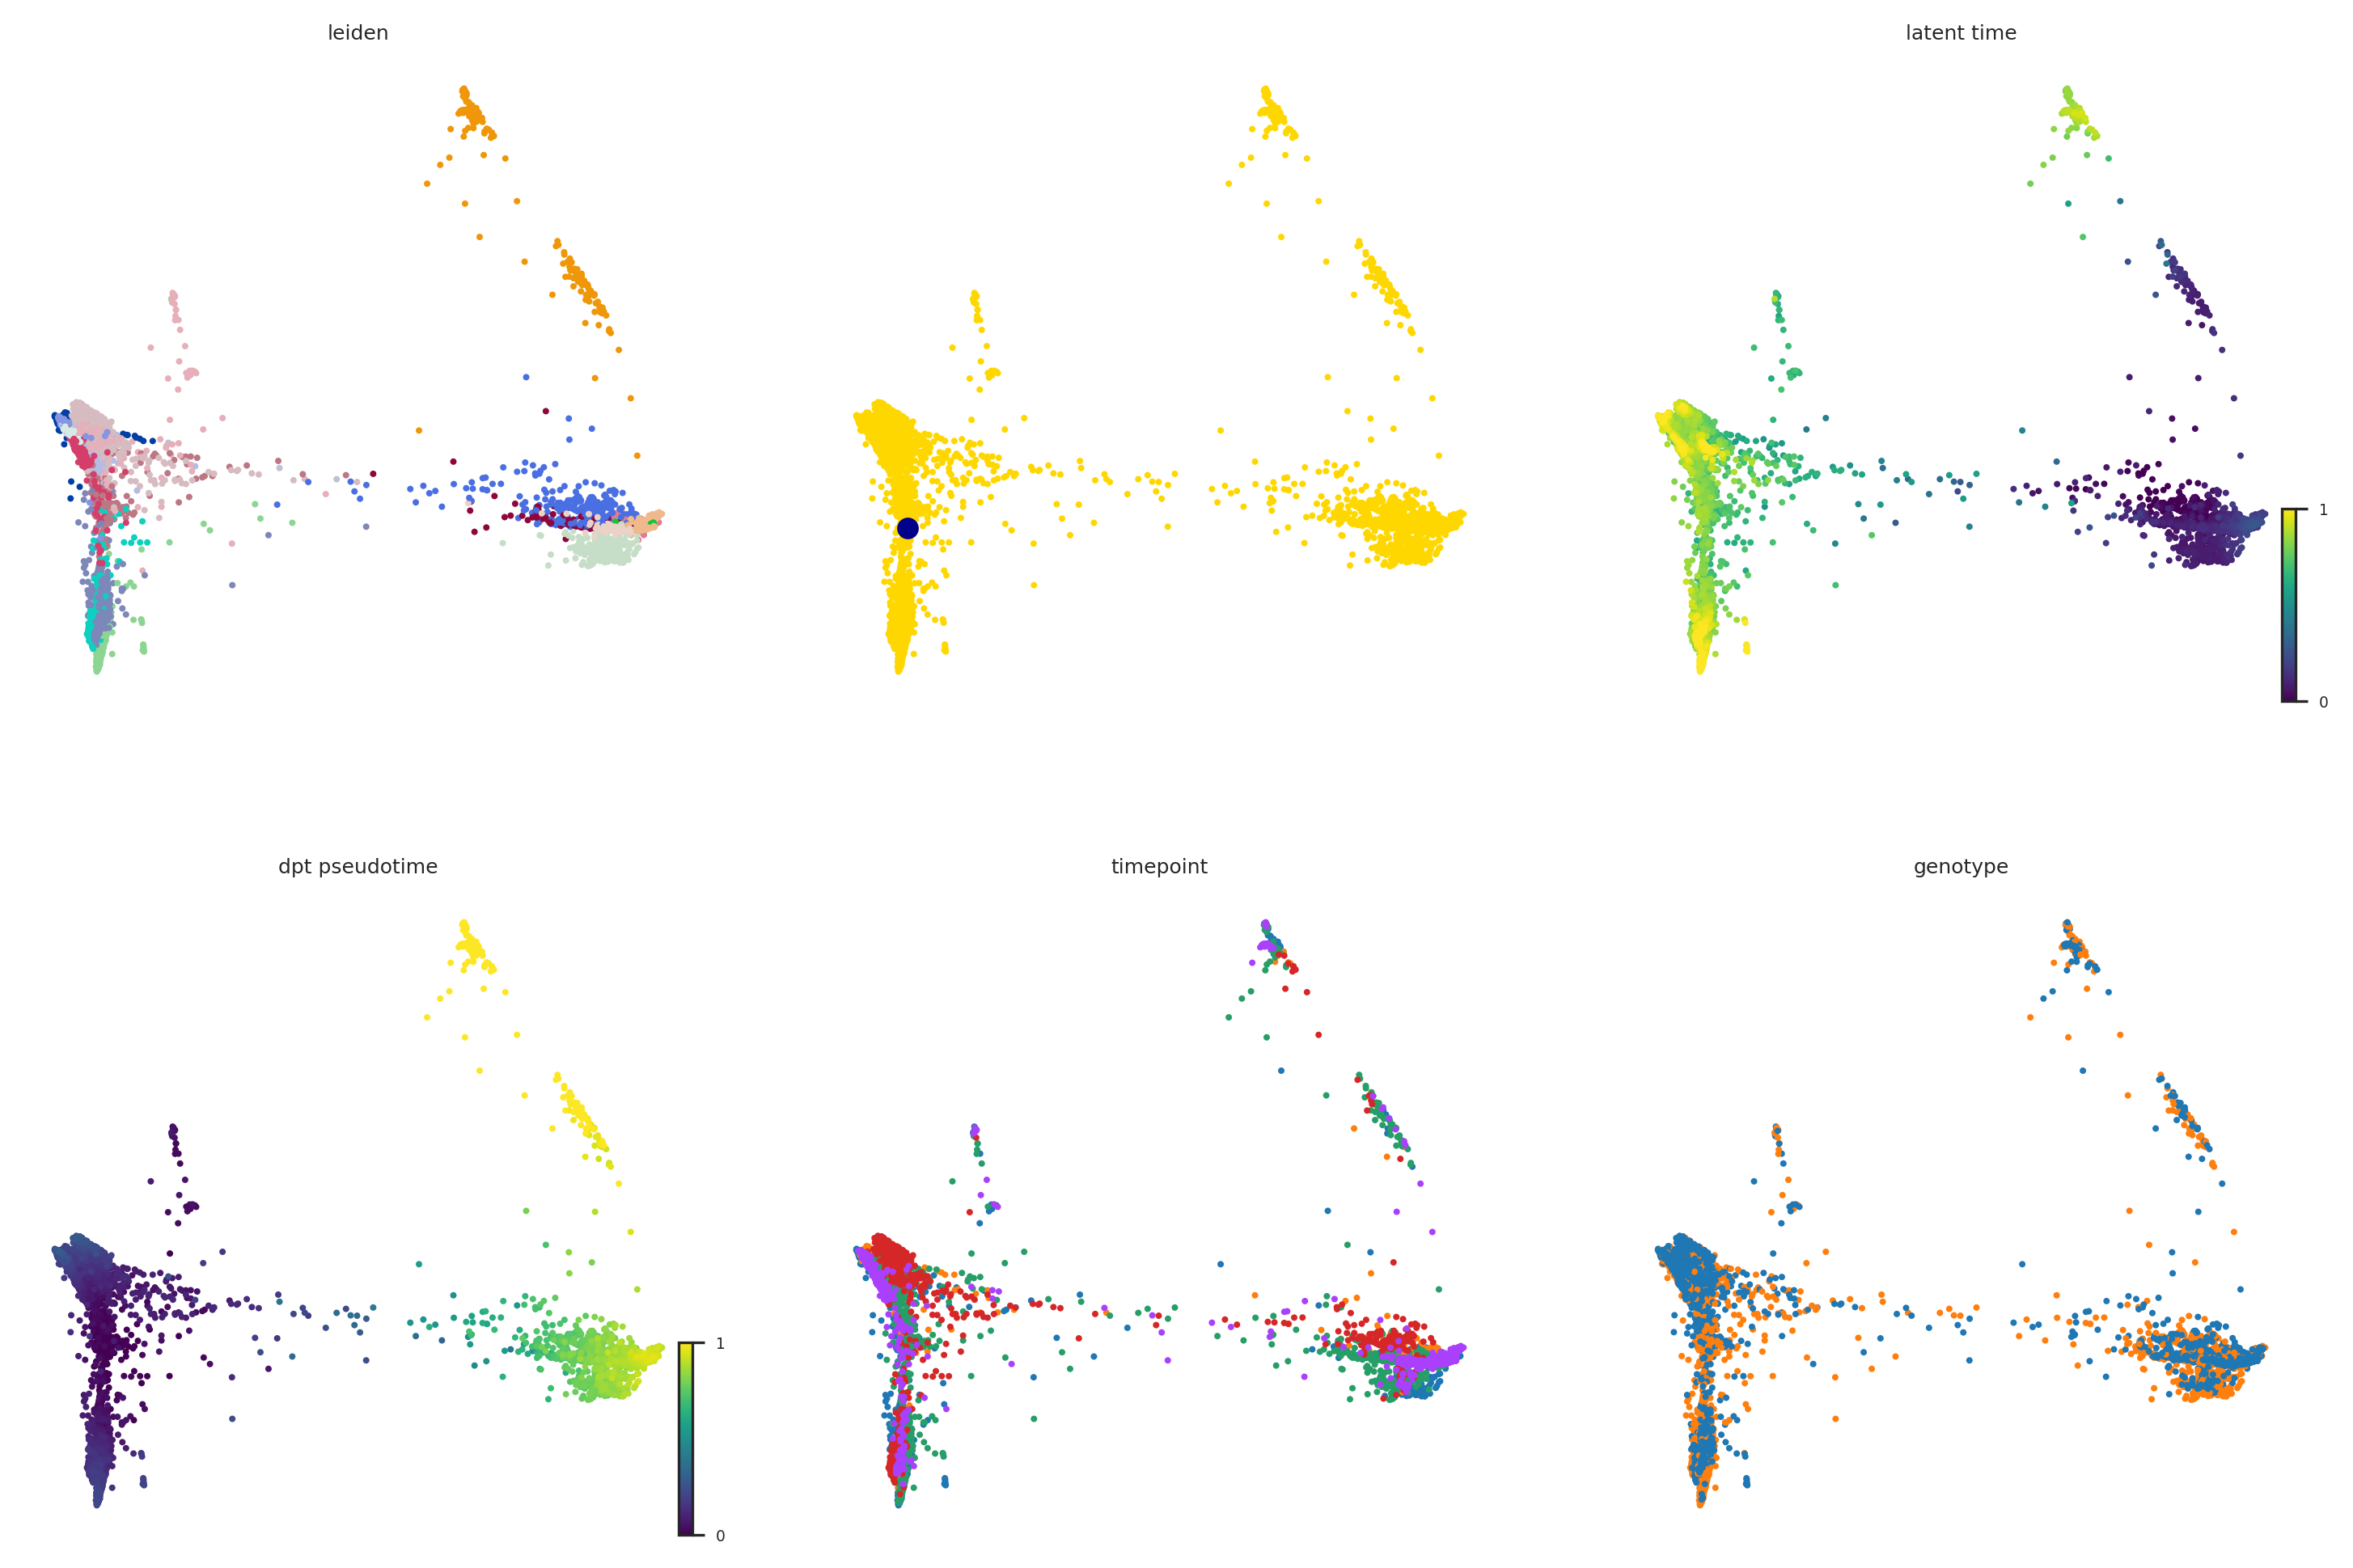

In [98]:
root_idx = np.random.choice(np.where(adata.obs['initial_states']  == '4' )[0])
adata.uns['iroot'] = root_idx
sc.tl.dpt(adata)

scv.pl.scatter(adata, color=['leiden', root_idx, 'latent_time', 'dpt_pseudotime', 'timepoint', 'genotype'],
               fontsize=6, basis='phate', ncols=3,  
               cmap='viridis', perc=[2, 98], colorbar=True, rescale_color=[0, 1])

In [99]:
adata.obs

batch genotype timepoint  n_genes_by_counts  \
AAACCCACAGAGGAAA     7202       WT       5wk               2132   
AAACGAATCGTGCTCT     7202       WT       5wk               2117   
AAACGAATCGTGTCAA     7202       WT       5wk               2034   
AAAGAACCAGTGACCC     7202       WT       5wk               2385   
AAAGGATAGGGCAGTT     7202       WT       5wk               2437   
...                   ...      ...       ...                ...   
TTGTTCATCCCGTGTT    58242     SCA1      30wk               1871   
TTTACGTGTCCTACAA-1  58242     SCA1      30wk               1991   
TTTACTGCAGTCTCTC    58242     SCA1      30wk               3424   
TTTGGTTTCCACTAGA    58242     SCA1      30wk               1514   
TTTGTTGTCGTTCTGC    58242     SCA1      30wk               3574   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCACAGAGGAAA                   7.665285        4031.0            8.302018   
AAACGAATCGTGCTCT                   7.658228        4047.0            8.305978   
AAACGAATCGTGTCAA                   7.618251        3522.0            8.167068   
AAAGAACCAGTGACCC                   7.777374        5346.0            8.584291   
AAAGGATAGGGCAGTT                   7.798933        4615.0            8.437284   
...                                     ...           ...                 ...   
TTGTTCATCCCGTGTT                   7.534763        3112.0            8.043343   
TTTACGTGTCCTACAA-1                 7.596894        3599.0            8.188689   
TTTACTGCAGTCTCTC                   8.138857        6890.0            8.837972   
TTTGGTTTCCACTAGA                   7.323171        2535.0            7.838343   
TTTGTTGTCGTTCTGC                   8.181720        8508.0            9.048880   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCACAGAGGAAA                     25.378318                    31.729099   
AAACGAATCGTGCTCT                     24.141339                    30.590561   
AAACGAATCGTGTCAA                     21.862578                    27.938671   
AAAGAACCAGTGACCC                     29.517396                    36.700337   
AAAGGATAGGGCAGTT                     22.405200                    28.602384   
...                                        ...                          ...   
TTGTTCATCCCGTGTT                     23.971722                    30.012853   
TTTACGTGTCCTACAA-1                   24.006669                    30.425118   
TTTACTGCAGTCTCTC                     17.474601                    22.902758   
TTTGGTTTCCACTAGA                     24.418146                    31.597633   
TTTGTTGTCGTTCTGC                     20.862717                    27.785614   

                    pct_counts_in_top_200_genes  ...  \
AAACCCACAGAGGAAA                      40.287770  ...   
AAACGAATCGTGCTCT                      39.362491  ...   
AAACGAATCGTGTCAA                      36.910846  ...   
AAAGAACCAGTGACCC                      45.155256  ...   
AAAGGATAGGGCAGTT                      37.248104  ...   
...                                         ...  ...   
TTGTTCATCCCGTGTT                      38.367609  ...   
TTTACGTGTCCTACAA-1                    39.538761  ...   
TTTACTGCAGTCTCTC                      30.711176  ...   
TTTGGTTTCCACTAGA                      41.775148  ...   
TTTGTTGTCGTTCTGC                      36.013164  ...   

                    velocity_self_transition  leiden  terminal_states  \
AAACCCACAGAGGAAA                    0.171722       1              NaN   
AAACGAATCGTGCTCT                    0.245354       0              NaN   
AAACGAATCGTGTCAA                    0.179791       8              NaN   
AAAGAACCAGTGACCC                    0.215270       1              NaN   
AAAGGATAGGGCAGTT                    0.013836       0              NaN   
...                                      ...     ...              ...   
TTGTTCATCCCGTGTT                    0.084038      20              NaN   
TTTACGTGTCCTACAA-1                  